In [249]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import joblib
import tensorflow as tf

In [250]:
# Crear el dataset simulado
num_rows = 2007
data = {
    'PetID': list(range(1, num_rows + 1)),
    'PetType': ['Dog'] * num_rows,
    'Breed': ['Labrador', 'Poodle', 'Beagle', 'Bulldog', 'Chihuahua', 'German Shepherd'] * (num_rows // 6) + ['Labrador'] * (num_rows % 6),
    'AgeMonths': [12, 24, 18, 36, 6, 48] * (num_rows // 6) + [12] * (num_rows % 6),
    'Color': ['Black', 'White', 'Brown', 'Grey', 'White', 'Black'] * (num_rows // 6) + ['Black'] * (num_rows % 6),
    'Size': ['Large', 'Medium', 'Small', 'Medium', 'Small', 'Large'] * (num_rows // 6) + ['Large'] * (num_rows % 6),
    'WeightKg': [30.0, 10.0, 8.0, 20.0, 3.0, 40.0] * (num_rows // 6) + [30.0] * (num_rows % 6),
    'Vaccinated': [1, 1, 0, 1, 1, 1] * (num_rows // 6) + [1] * (num_rows % 6),
    'HealthCondition': [0, 1, 0, 1, 0, 1] * (num_rows // 6) + [0] * (num_rows % 6),
    'TimeInShelterDays': [30, 45, 60, 10, 5, 20] * (num_rows // 6) + [30] * (num_rows % 6),
    'AdoptionFee': [150, 200, 100, 250, 50, 300] * (num_rows // 6) + [150] * (num_rows % 6),
    'PreviousOwner': [0, 1, 0, 1, 0, 1] * (num_rows // 6) + [0] * (num_rows % 6),
    'AdoptionLikelihood': [90, 70, 60, 85, 95, 75] * (num_rows // 6) + [90] * (num_rows % 6)
}

# Crear DataFrame
df = pd.DataFrame(data)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


In [252]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,1,Dog,Labrador,12,Black,Large,30.0,1,0,30,150,0,90
1,2,Dog,Poodle,24,White,Medium,10.0,1,1,45,200,1,70
2,3,Dog,Beagle,18,Brown,Small,8.0,0,0,60,100,0,60
3,4,Dog,Bulldog,36,Grey,Medium,20.0,1,1,10,250,1,85
4,5,Dog,Chihuahua,6,White,Small,3.0,1,0,5,50,0,95


In [253]:
X = df.drop(columns=['AdoptionLikelihood'])
y = df['AdoptionLikelihood']

In [254]:
# Definir características numéricas y categóricas
numeric_features = ['AgeMonths', 'WeightKg', 'TimeInShelterDays', 'AdoptionFee']
categorical_features = ['PetType', 'Breed', 'Color', 'Size']

In [255]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [256]:
# One-Hot Encoding para características categóricas
enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cats = enc.fit_transform(X[categorical_features])

In [257]:
# Crear DataFrame para las características codificadas
encoded_cats_df = pd.DataFrame(encoded_cats, columns=enc.get_feature_names_out(categorical_features))

In [258]:
X = pd.concat([X[numeric_features],X[['Vaccinated', 'HealthCondition', 'PreviousOwner']],encoded_cats_df],axis=True)

In [259]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo

In [260]:
oculta = tf.keras.layers.Dense(units=64,input_shape=[21])
oculta1 = tf.keras.layers.Dense(units=64)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta,oculta1,salida])

c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [261]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(0.01),loss='mean_squared_error')

In [262]:
print('Comenzando entrenamiento')
historial = modelo.fit(X_train,y_train,epochs=1000,verbose=False)
print('Modelo entrenado')

Comenzando entrenamiento
Modelo entrenado


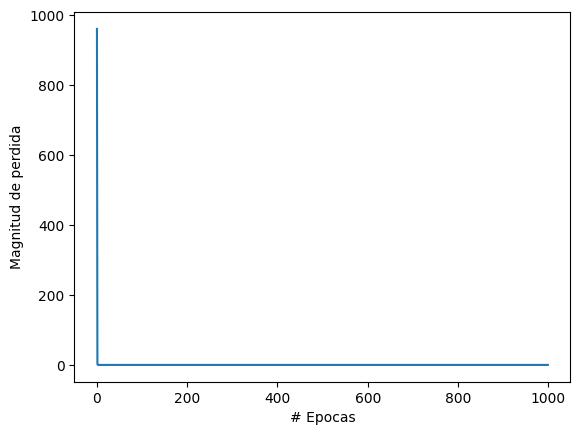

In [263]:
plt.xlabel('# Epocas')
plt.ylabel('Magnitud de perdida')
plt.plot(historial.history['loss'])

In [286]:
# Realizar la predicción
print('Vamos a hacer una predicción')
nuevo_dato = np.array([[34, 5, 20, 100, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]]) # Total de input_shape=[21])
nuevo_dato[:, :4] = scaler.transform(nuevo_dato[:, :4])  # Escalar solo las características numéricas
resultado = modelo.predict(nuevo_dato)

print(f'El resultado es: {resultado[0][0]} días')

Vamos a hacer una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
El resultado es: 35.29731369018555 días


c:\Users\FRANK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


12: AgeMonths (12 meses)
30: WeightKg (30 kg)
30: TimeInShelterDays (30 días en el refugio)
150: AdoptionFee ($150 de tarifa de adopción)
1: Vaccinated (sí)
0: HealthCondition (saludable)
0: PreviousOwner (no)
1: PetType_Dog (es un perro)
0: Breed_Labrador (no es un Labrador)
0: Breed_Poodle (no es un Poodle)
0: Breed_Beagle (no es un Beagle)
0: Breed_Bulldog (no es un Bulldog)
0: Breed_Chihuahua (no es un Chihuahua)
0: Breed_German Shepherd (no es un Pastor Alemán)
0: Color_Black (no es negro)
0: Color_White (no es blanco)
0: Color_Brown (no es marrón)
1: Color_Grey (es gris)
0: Size_Large (no es grande)
0: Size_Medium (no es mediano)
1: Size_Small (es pequeño)

In [277]:
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,1,Dog,Labrador,12,Black,Large,30.0,1,0,30,150,0,90
1,2,Dog,Poodle,24,White,Medium,10.0,1,1,45,200,1,70
2,3,Dog,Beagle,18,Brown,Small,8.0,0,0,60,100,0,60
3,4,Dog,Bulldog,36,Grey,Medium,20.0,1,1,10,250,1,85
4,5,Dog,Chihuahua,6,White,Small,3.0,1,0,5,50,0,95
